In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import statsmodels.api as sm
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
# to read data set
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# to get the shape of the data
df.shape

(9240, 37)

In [4]:
#to get the information of datatype in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# to get the decription about the data set
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#to check if null value is present in the dataset
round((df.isnull().sum()),2)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
list=df.select_dtypes(include=[object]).columns
list


Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
for i in list:
    print('name of i:',i)
    print('null value is: ',df[i].isnull().sum())
    print(df[i].value_counts())

name of i: Prospect ID
null value is:  0
17868ac7-71a8-49a7-8aa0-deea12139b71    1
33962b22-69c3-40ab-8dbf-89fa9fddc25e    1
a857faa9-5356-44fb-8eaa-0baf9bc17275    1
a3c05fac-bcaa-4251-980c-acab813b9044    1
6d617705-abb8-4ea7-a278-ddc7db839345    1
c7e11b7a-37dd-4033-9f52-5bd872a254e3    1
c34e038a-b935-40d1-89fe-e472aec9950f    1
3c3eba72-cda4-4519-8d79-ee33f99d66b0    1
e22c1bf3-50cd-4254-8e6c-e8ca92719361    1
393a4d46-8f73-43a4-966a-43d22773ba68    1
d6ce895c-4004-4457-a094-eb92b90521e6    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
b37c097d-30ff-47f5-a1f0-8ffc90dc77cb    1
fa22777e-b1e3-4141-baf7-d8abc2efcb73    1
324b304a-1baa-4bed-a7a5-76f06536c29c    1
d22bfe40-a444-4e97-b6b7-ccf40117710b    1
a2ad8e53-84ce-4a61-b63b-2020ab75d47c    1
8c9b809c-9911-4d4c-94f5-9082043c0fe7    1
557bc9f4-4de9-4d83-8ce2-161b9252bbcf    1
97928454-d5cf-4fa1-bb31-c300e24cf8a0    1
5940c1c7-82fd-45e3-992a-e8119d5abaac    1
6ca84b0d-a8a8-47b2-8089-4e7f86673b8a    1
f2b9ea56-11d7-4c82-b781-bdddd2375cf

null value is:  4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
name of i: Asymmetrique Profile Index
null value is:  4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
name of i: I agree to pay the amount through cheque
null value is:  0
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
name of i: A free copy of Mastering The Interview
null value is:  0
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
name of i: Last Notable Activity
null value is:  0
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Ema

no of na value in the country:  26.63


[Text(0, 0, 'India'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Kuwait'),
 Text(0, 0, 'Oman'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Qatar'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Sri Lanka'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Asia/Pacific Region'),
 Text(0, 0, 'Uganda'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Tanzania'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'Malaysia'),
 Text(0, 0, 'Liberia'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Indonesia')]

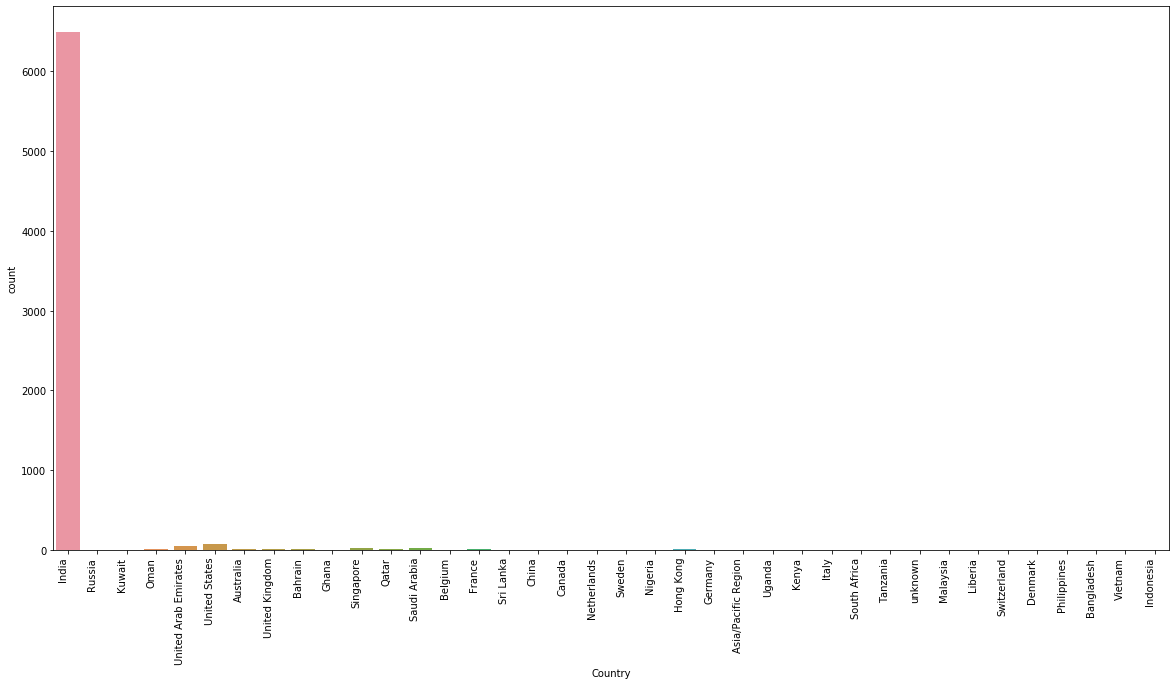

In [10]:
#Country
print('no of na value in the country: ' ,round(100*(df['Country'].isnull().sum()/df.shape[0]),2))

plt.figure(figsize=(20,10))
g=sns.countplot(df['Country'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

In [11]:
#as we have 26 percent null value and from analysis we can consider country will not impact the selection of hot lead as 
# this is online course and can be persuade from any place
df.drop(columns='Country',inplace=True)

no of null value Lead Quality 51.59


[Text(0, 0, 'Low in Relevance'),
 Text(0, 0, 'Might be'),
 Text(0, 0, 'Not Sure'),
 Text(0, 0, 'Worst'),
 Text(0, 0, 'High in Relevance')]

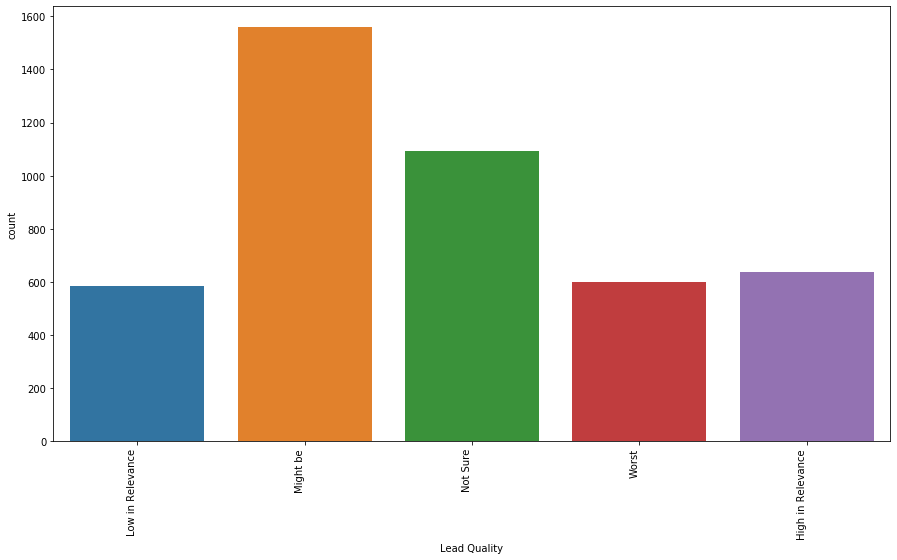

In [12]:
# Lead Quality
print('no of null value Lead Quality' ,round(100*(df['Lead Quality'].isnull().sum()/df.shape[0]),2))

plt.figure(figsize=(15,8))
g=sns.countplot(df['Lead Quality'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right") 

In [13]:
#more than 50 percent value are missing in the column we cannot impute these value it is better to delete the column
df.drop(columns='Lead Quality',inplace=True)

null value in Asymmetrique Activity Index:  45.65


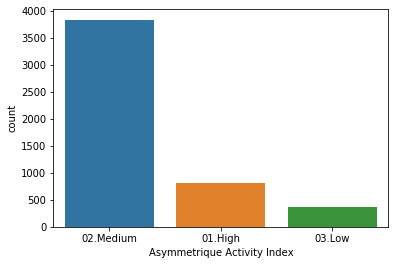

In [14]:
print('null value in Asymmetrique Activity Index: ' ,round(100*(df['Asymmetrique Activity Index'].isnull().sum()/df.shape[0]),2))
df['Asymmetrique Activity Index'].value_counts()
sns.countplot(df['Asymmetrique Activity Index'])
#Lead Origin

null value in Asymmetrique Profile Index:  45.65


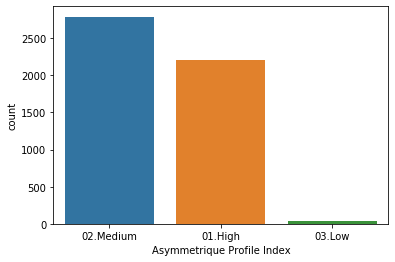

In [15]:
print('null value in Asymmetrique Profile Index: ' ,round(100*(df['Asymmetrique Profile Index'].isnull().sum()/df.shape[0]),2))
df['Asymmetrique Profile Index'].value_counts()
sns.countplot(df['Asymmetrique Profile Index'])


null value in Asymmetrique Activity Score:  45.65


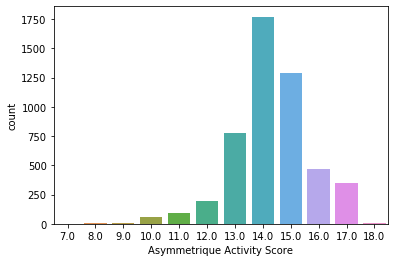

In [16]:
print('null value in Asymmetrique Activity Score: ' ,round(100*(df['Asymmetrique Activity Score'].isnull().sum()/df.shape[0]),2))
df['Asymmetrique Activity Score'].value_counts()
sns.countplot(df['Asymmetrique Activity Score'])

null value in Asymmetrique Profile Score:  45.65


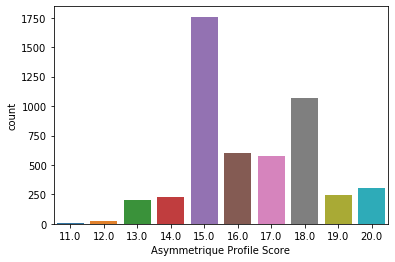

In [17]:
print('null value in Asymmetrique Profile Score: ' ,round(100*(df['Asymmetrique Profile Score'].isnull().sum()/df.shape[0]),2))
df['Asymmetrique Profile Score'].value_counts()
sns.countplot(df['Asymmetrique Profile Score'])

In [18]:
del1=['Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index']
df.drop(columns=del1,inplace=True)

null value in City:  15.37
null value in City:  39.71


[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Thane & Outskirts'),
 Text(0, 0, 'Other Metro Cities'),
 Text(0, 0, 'Other Cities'),
 Text(0, 0, 'Other Cities of Maharashtra'),
 Text(0, 0, 'Tier II Cities')]

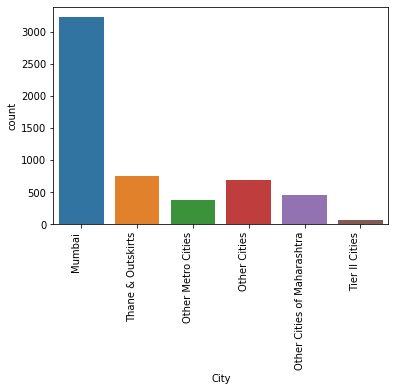

In [19]:
# City
print('null value in City: ' ,round(100*(df['City'].isnull().sum()/df.shape[0]),2))
# df['City'].value_counts()
df['City'].replace(to_replace='Select',value=np.nan,inplace=True)
print('null value in City: ' ,round(100*(df['City'].isnull().sum()/df.shape[0]),2))
df['City'].value_counts()
g=sns.countplot(df['City'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

In [20]:
#city column has almost 40 percent null value and as this is online course se person city is not very importnat columns
#so instead of imputing valye we will remove the city column
df.drop(columns='City',inplace=True)

[Text(0, 0, 'Select'),
 Text(0, 0, 'Word Of Mouth'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Online Search'),
 Text(0, 0, 'Multiple Sources'),
 Text(0, 0, 'Advertisements'),
 Text(0, 0, 'Student of SomeSchool'),
 Text(0, 0, 'Email'),
 Text(0, 0, 'Social Media'),
 Text(0, 0, 'SMS')]

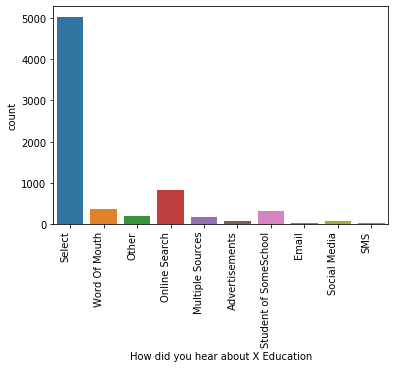

In [21]:
# How did you hear about X Education
g=sns.countplot(df['How did you hear about X Education'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

In [22]:
print('null value in How did you hear about X Education: ' ,round(100*(df['How did you hear about X Education'].isnull().sum()/df.shape[0]),2))
df['How did you hear about X Education'].value_counts()
df['How did you hear about X Education'].replace(to_replace='Select',value=np.nan,inplace=True)
print('null value in How did you hear about X Education: ' ,round(100*(df['How did you hear about X Education'].isnull().sum()/df.shape[0]),2))
print(df['How did you hear about X Education'].value_counts())


null value in How did you hear about X Education:  23.89
null value in How did you hear about X Education:  78.46
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64


In [23]:
#How did you hear about X Education columns has 76 percent missing value we will drop this column
df.drop(columns='How did you hear about X Education',inplace=True)

null value in Tags:  36.29
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                           

[Text(0, 0, 'Interested in other courses'),
 Text(0, 0, 'Ringing'),
 Text(0, 0, 'Will revert after reading the email'),
 Text(0, 0, 'Lost to EINS'),
 Text(0, 0, 'In confusion whether part time or DLP'),
 Text(0, 0, 'Busy'),
 Text(0, 0, 'switched off'),
 Text(0, 0, 'in touch with EINS'),
 Text(0, 0, 'Already a student'),
 Text(0, 0, 'Diploma holder (Not Eligible)'),
 Text(0, 0, 'Graduation in progress'),
 Text(0, 0, 'Closed by Horizzon'),
 Text(0, 0, 'number not provided'),
 Text(0, 0, 'opp hangup'),
 Text(0, 0, 'Not doing further education'),
 Text(0, 0, 'invalid number'),
 Text(0, 0, 'wrong number given'),
 Text(0, 0, 'Interested  in full time MBA'),
 Text(0, 0, 'Still Thinking'),
 Text(0, 0, 'Lost to Others'),
 Text(0, 0, 'Shall take in the next coming month'),
 Text(0, 0, 'Lateral student'),
 Text(0, 0, 'Interested in Next batch'),
 Text(0, 0, 'Recognition issue (DEC approval)'),
 Text(0, 0, 'Want to take admission but has financial problems'),
 Text(0, 0, 'University not recognized

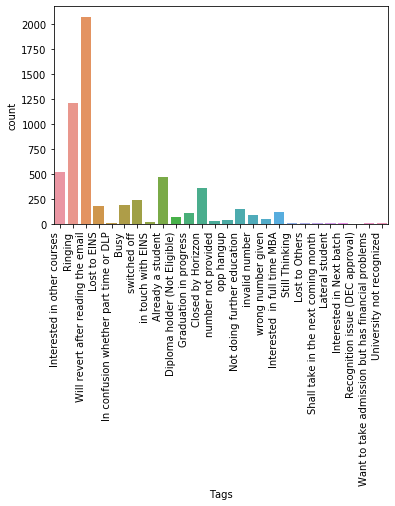

In [24]:
print('null value in Tags: ' ,round(100*(df['Tags'].isnull().sum()/df.shape[0]),2))
print(df['Tags'].value_counts())
g=sns.countplot(df['Tags'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
#Lead Origin

null value in Lead Profile:  29.32
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Null value in Lead Profile:  74.19


[Text(0, 0, 'Potential Lead'),
 Text(0, 0, 'Other Leads'),
 Text(0, 0, 'Lateral Student'),
 Text(0, 0, 'Dual Specialization Student'),
 Text(0, 0, 'Student of SomeSchool')]

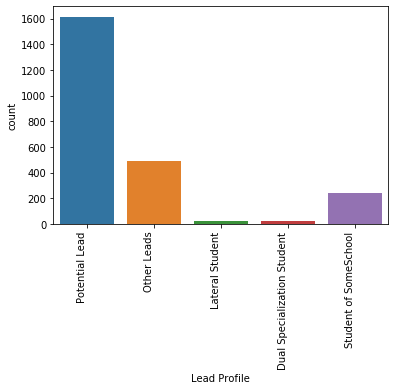

In [25]:
print('null value in Lead Profile: ' ,round(100*(df['Lead Profile'].isnull().sum()/df.shape[0]),2))
print(df['Lead Profile'].value_counts())
df['Lead Profile'].replace(to_replace='Select',value=np.nan,inplace=True)
print(df['Lead Profile'].value_counts())
print('Null value in Lead Profile: ' ,round(100*(df['Lead Profile'].isnull().sum()/df.shape[0]),2))

g=sns.countplot(df['Lead Profile'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

In [26]:
#Null value in Lead Profile:  74.19 that is very high percentage of missing value
#we will delete the lead profile column
df.drop(columns='Lead Profile',inplace=True)

null value in What matters most to you in choosing this course:  29.32
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
null value in What matters most to you in choosing this course:  0.0
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


[Text(0, 0, 'Better Career Prospects'),
 Text(0, 0, 'Flexibility & Convenience'),
 Text(0, 0, 'Other')]

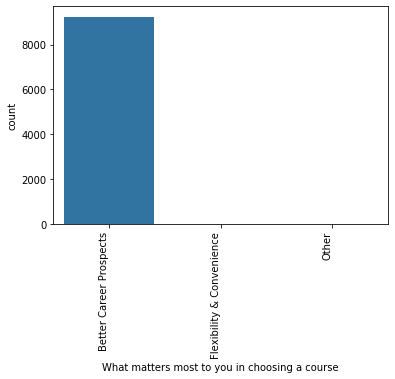

In [27]:
print('null value in What matters most to you in choosing this course: ' ,round(100*(df['What matters most to you in choosing a course'].isnull().sum()/df.shape[0]),2))
print(df['What matters most to you in choosing a course'].value_counts())
df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)
print('null value in What matters most to you in choosing this course: ' ,round(100*(df['What matters most to you in choosing a course'].isnull().sum()/df.shape[0]),2))
print(df['What matters most to you in choosing a course'].value_counts())

g=sns.countplot(df['What matters most to you in choosing a course'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

null value in What is your current occupation:  29.11
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
null value in What is your current occupation:  0.0
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


[Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Working Professional'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Housewife')]

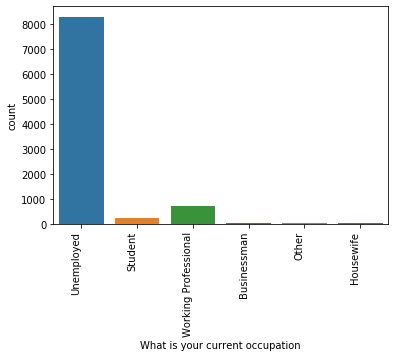

In [28]:
print('null value in What is your current occupation: ' ,round(100*(df['What is your current occupation'].isnull().sum()/df.shape[0]),2))
print(df['What is your current occupation'].value_counts())
df['What is your current occupation'].fillna('Unemployed',inplace=True)

print('null value in What is your current occupation: ' ,round(100*(df['What is your current occupation'].isnull().sum()/df.shape[0]),2))
print(df['What is your current occupation'].value_counts())

g=sns.countplot(df['What is your current occupation'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

In [29]:
# Converted                                        
# TotalVisits                                      
# Total Time Spent on Website                      
# Page Views Per Visit 

Null values in converted 0.0


[Text(0, 0, '0'), Text(0, 0, '1')]

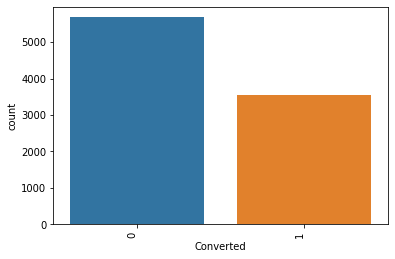

In [30]:
#Converted
print('Null values in converted' ,round(100*(df['Converted'].isnull().sum()/df.shape[0]),2))
g=sns.countplot(df['Converted'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

Null values in TotalVisits 1.48


[Text(0, 0, 'Null'),
 Text(0, 0, '(0,10)'),
 Text(0, 0, '(10,20)'),
 Text(0, 0, '(20,30)'),
 Text(0, 0, '(40,50)'),
 Text(0, 0, '(30,40)')]

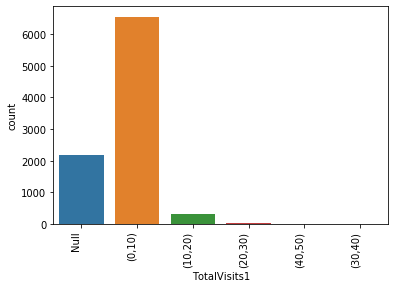

In [31]:
#TotalVisits
def visit_categorsiation(x):
    if x<=0:
        return 'Null'
    elif 0<x<=10:
        return '(0,10)'
    elif 10<x<=20:
        return '(10,20)'
    elif 20<x<=30:
        return '(20,30)'
    elif 30<x<=40:
        return '(30,40)'
    elif 40<x<=50:
        return '(40,50)'
df['TotalVisits1']=df['TotalVisits'].apply(lambda x: visit_categorsiation(x))    
print('Null values in TotalVisits' ,round(100*(df['TotalVisits'].isnull().sum()/df.shape[0]),2))
g=sns.countplot(df['TotalVisits1'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

Total Time Spent on Website 0.0


[Text(0, 0, 'Null'),
 Text(0, 0, '(500,1000)'),
 Text(0, 0, '(1500,2000)'),
 Text(0, 0, '(0,500)'),
 Text(0, 0, '(1000,1500)'),
 Text(0, 0, '(2000,2500)')]

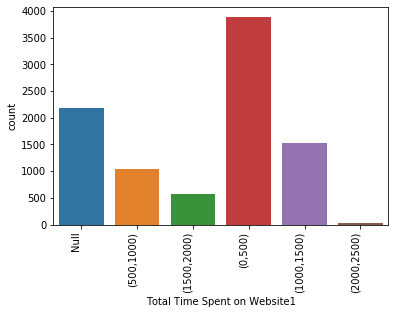

In [32]:
# Total Time Spent on Website
#defined a method to categorize time 
def time_categorsiation(x):
    if x<=0:
        return 'Null'
    elif 0<x<=500:
        return '(0,500)'
    elif 50<x<=1000:
        return '(500,1000)'
    elif 1000<x<=1500:
        return '(1000,1500)'
    elif 1500<x<=2000:
        return '(1500,2000)'
    elif 2000<x<=2500:
        return '(2000,2500)'
df['Total Time Spent on Website1']=df['Total Time Spent on Website'].apply(lambda x: time_categorsiation(x))
print('Total Time Spent on Website' ,round(100*(df['Total Time Spent on Website'].isnull().sum()/df.shape[0]),2))
g=sns.countplot(df['Total Time Spent on Website1'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

Null values in Page Views Per Visit 1.48


[Text(0, 0, 'Null'),
 Text(0, 0, '(0,5)'),
 Text(0, 0, '(5,10)'),
 Text(0, 0, '(10,15)'),
 Text(0, 0, '(15,20)'),
 Text(0, 0, '(20,25)')]

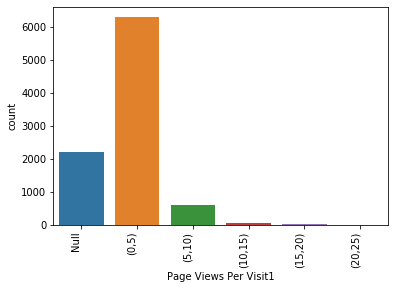

In [33]:
# Page Views Per Visit 
def page_categorsiation(x):
    if x<=0:
        return 'Null'
    elif 0<x<=5:
        return '(0,5)'
    elif 5<x<=10:
        return '(5,10)'
    elif 10<x<=15:
        return '(10,15)'
    elif 15<x<=20:
        return '(15,20)'
    elif 20<x<=25:
        return '(20,25)'
df['Page Views Per Visit1']=df['Page Views Per Visit'].apply(lambda x: page_categorsiation(x))    
print('Null values in Page Views Per Visit' ,round(100*(df['Page Views Per Visit'].isnull().sum()/df.shape[0]),2))
g=sns.countplot(df['Page Views Per Visit1'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

In [34]:
#dropping row with missing value for these columns
df.dropna(subset=['Page Views Per Visit','Lead Source','TotalVisits','Last Activity'],how='any',inplace=True)
df.drop(columns=['Page Views Per Visit1', 'Total Time Spent on Website1', 'TotalVisits1'], inplace=True)


In [35]:
df.shape

(9074, 28)

In [36]:

df['Specialization'].replace(to_replace='Select',value=np.nan,inplace=True)
#df['City'].replace(to_replace='Select',value=np.nan,inplace=True)
print('null value in Specialization: ' ,round(100*(df['Specialization'].isnull().sum()/df.shape[0]),2))
print(df['Specialization'].value_counts())

null value in Specialization:  36.17
Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


In [37]:
df['Do Not Email']=df['Do Not Email'].map({'Yes':1,'No':0})
df['Do Not Call']=df['Do Not Call'].map({'Yes':1,'No':0})
df['Search']=df['Search'].map({'Yes':1,'No':0})
df['Magazine']=df['Magazine'].map({'Yes':1,'No':0})
df['Newspaper Article']=df['Newspaper Article'].map({'Yes':1,'No':0})
df['X Education Forums']=df['X Education Forums'].map({'Yes':1,'No':0})
df['Newspaper']=df['Newspaper'].map({'Yes':1,'No':0})
df['Digital Advertisement']=df['Digital Advertisement'].map({'Yes':1,'No':0})
df['Through Recommendations']=df['Through Recommendations'].map({'Yes':1,'No':0})
df['Receive More Updates About Our Courses']=df['Receive More Updates About Our Courses'].map({'Yes':1,'No':0})
df['Update me on Supply Chain Content']=df['Update me on Supply Chain Content'].map({'Yes':1,'No':0})
df['Get updates on DM Content']=df['Get updates on DM Content'].map({'Yes':1,'No':0})
df['I agree to pay the amount through cheque']=df['I agree to pay the amount through cheque'].map({'Yes':1,'No':0})
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

df.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,Interested in other courses,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,Ringing,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,Ringing,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified


In [38]:
#df.info()
df.select_dtypes(include=['object']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Last Notable Activity'],
      dtype='object')

## Dummy variable creation


In [39]:
# to create dummy variable 
#instead of creating dummy singly created dummy for required variable in one go
pd.options.display.max_columns=40
status=pd.get_dummies(df[[ 'Lead Origin', 'Lead Source', 'Last Activity', 
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 
         'Last Notable Activity']],dummy_na=True,drop_first=True)
status.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_nan,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Tags_nan,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Notable Activity_nan
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
# Add the results to the original dataframe
df=pd.concat([df,status],axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Tags_nan,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Notable Activity_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [41]:
# Drop the original coulumn name as we have created the dummies for it
df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 
       'Specialization', 
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 
        'Last Notable Activity'],inplace=True)

In [42]:
df.shape

(9074, 131)

### checking for outliers in the variable


In [43]:
#Columns considered for outlier ananlysis
df1=df[['Lead Number','Total Time Spent on Website','TotalVisits','Page Views Per Visit']]

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,482.887481,3.456028,2.370151
std,23348.029512,545.256560,4.858802,2.160871
min,579533.000000,0.000000,0.000000,0.000000
25%,596406.000000,11.000000,1.000000,1.000000
50%,615278.500000,246.000000,3.000000,2.000000
75%,637176.500000,922.750000,5.000000,3.200000
90%,650276.800000,1373.000000,7.000000,5.000000
95%,655344.450000,1557.000000,10.000000,6.000000
99%,659563.350000,1839.000000,17.000000,9.000000


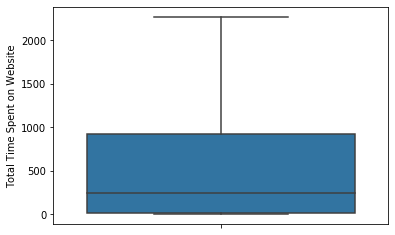

In [45]:
sns.boxplot(y='Total Time Spent on Website',data=df)

In [46]:
q1=df['Page Views Per Visit'].quantile(0.99)
q2=df['TotalVisits'].quantile(0.99)
df=df[df['Page Views Per Visit']<=q1]
df=df[df['TotalVisits']<=q2]
df.shape


(8924, 131)

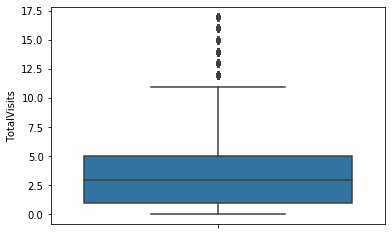

In [47]:
sns.boxplot(y='TotalVisits',data=df)

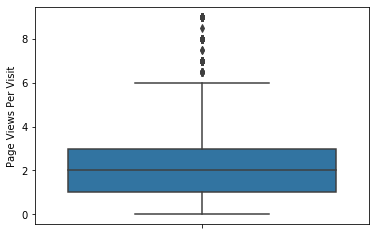

In [48]:
sns.boxplot(y='Page Views Per Visit',data=df)

In [49]:
#df.info()
df.select_dtypes(include=['int64']).head()

,Lead Number,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,1532,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,0,0,305,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,1,1428,0,0,0,0,0,0,0,0,0,0,0,0


## Train test split

In [50]:
df.select_dtypes(include=['float64']).columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

In [51]:
X=df.drop(columns=['Lead Number','Converted','Prospect ID'])
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Tags_nan,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Notable Activity_nan
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [52]:
y=df[['Converted']]
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [53]:
#splitting the data set into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [54]:
print(X_train.shape)
print(X_test.shape)

(6246, 128)
(2678, 128)


In [55]:
X_train1=X_train.copy()
X_test1=X_test.copy()

In [56]:
scaler=StandardScaler()

In [57]:
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]=scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Tags_nan,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Notable Activity_nan
6676,0,0,-0.049636,1.395668,0.395289,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6138,0,0,0.297929,0.609686,0.926758,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8650,0,0,-0.049636,1.178657,0.395289,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3423,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6552,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train.shape

(6246, 128)

## Applying logistic regression model

In [59]:
logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6137
Model Family:                Binomial   Df Model:                          108
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        15:53:56   Pearson chi2:                 3.52e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     5.06e+15   9.78e+07   5.17e+07      0.000    5.06e+15    5.06e+15
Do Not Email                                                              -3.5e+14   4.67e+06   -7.5e+07      0.000    -3.5e+14    -3.5e+14
Do Not Call                                                              4.264e+15   4.78e+07   8.93e+07      0.000    4.26e+15    4.26e+15
TotalVisits                                                              1.056e+14   1.35e+06   7.82e+07      0.000    1.06e+14    1.06e+14
Total Time Spent on Website                                              4.167e+14   1.04e+06   3.99e+08      0.000    4.17e+14    4.17e+14
Page Views Per Visit                                                    -1.113e+14   1.47e+06  -7.59e+07      0.000   -1.11e+14   -1.11e+14
Search                                                                   -2.03e+14   2.35e+07  -8.65e+06      0.000   -2.03e+14   -2.03e+14
Magazine                                                                   11.3945   6.78e-07   1.68e+07      0.000      11.394      11.395
Newspaper Article                                                        5.114e+15   6.75e+07   7.58e+07      0.000    5.11e+15    5.11e+15
X Education Forums                                                        -57.7894   7.94e-07  -7.28e+07      0.000     -57.789     -57.789
Newspaper                                                               -4.836e+15   6.74e+07  -7.18e+07      0.000   -4.84e+15   -4.84e+15
Digital Advertisement                                                   -1.401e+14   3.92e+07  -3.57e+06      0.000    -1.4e+14    -1.4e+14
Through Recommendations                                                  8.229e+14   2.87e+07   2.86e+07      0.000    8.23e+14    8.23e+14
Receive More Updates About Our Courses                                    -30.8800   6.97e-07  -4.43e+07      0.000     -30.880     -30.880
Update me on Supply Chain Content                                          43.8034   1.77e-06   2.48e+07      0.000      43.803      43.803
Get updates on DM Content                                                 -19.6398   1.12e-06  -1.75e+07      0.000     -19.640     -19.640
I agree to pay the amount through cheque                                   -2.8799   8.66e-07  -3.33e+06      0.000      -2.880      -2.880
A free copy of Mastering The Interview                                  -5.039e+13   2.78e+06  -1.81e+07      0.000   -5.04e+13   -5.04e+13
Lead Origin_Landing Page Submission                                     -2.545e+14   3.45e+06  -7.38e+07      0.000   -2.54e+14   -2.54e+14
Lea

In [60]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 35)             
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False]

In [63]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [64]:
rfe.ranking_

array([ 1, 44, 31,  1, 30, 73, 79, 47, 82, 55, 64, 50, 78, 88, 89, 91, 46,
        1,  1, 20, 83, 17, 21, 19, 76, 80,  1, 18, 74, 75, 16, 10, 87, 72,
        1, 49, 36, 28, 68, 38, 84, 90,  1,  1, 39, 61, 53, 70, 57,  1,  1,
        1, 62,  1, 67, 48, 54, 77, 86, 45, 23, 58, 27, 29,  9, 51, 15,  8,
       14, 37, 65, 33,  5, 13,  3,  2, 41, 40, 69,  1,  1, 32, 93, 56, 66,
       81,  1,  1,  1,  4,  6, 22, 12,  1,  1,  1, 25,  1, 85,  1,  1, 26,
       52, 24,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1, 60, 35, 71, 92, 42,
        1,  1, 34, 63,  1, 43, 11, 59, 94])

In [65]:
col=X_train.columns[rfe.support_]

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.7
Date:                Mon, 18 Nov 2019   Deviance:                       2355.3
Time:                        15:54:02   Pearson chi2:                 1.08e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.0735      0.477     -4.349      0.000      -3.008      -1.139
Do Not Email                                     -0.7355      0.303     -2.431      0.015      -1.328      -0.143
Total Time Spent on Website                       1.0794      0.063     17.252      0.000       0.957       1.202
Lead Origin_Landing Page Submission              -0.7227      0.140     -5.179      0.000      -0.996      -0.449
Lead Origin_Lead Add Form                         1.0703      0.431      2.483      0.013       0.226       1.915
Lead Source_Olark Chat                            0.8341      0.170      4.900      0.000       0.501       1.168
Lead Source_Welingak Website                      3.8421      0.845      4.547      0.000       2.186       5.498
Last Activity_Converted to Lead                  -0.9338      0.392     -2.385      0.017      -1.701      -0.166
Last Activity_Email Bounced                      -1.0199      0.620     -1.645      0.100      -2.235       0.195
Last Activity_Had a Phone Conversation            3.0203      2.000      1.510      0.131      -0.899       6.939
Last Activity_Olark Chat Conversation            -0.9799      0.317     -3.089      0.002      -1.602      -0.358
Last Activity_Page Visited on Website            -0.6862      0.249     -2.755      0.006      -1.174      -0.198
Last Activity_SMS Sent                            0.9772      0.266      3.674      0.000       0.456       1.499
What is your current occupation_Student          -0.9949      0.624     -1.595      0.111      -2.217       0.228
What is your current occupation_Unemployed       -0.8619      0.370     -2.327      0.020      -1.588      -0.136
Tags_Busy                                         2.6727      0.381      7.006      0.000       1.925       3.420
Tags_Closed by Horizzon                           8.0961      0.795     10.184      0.000       6.538       9.654
Tags_Diploma holder (Not Eligible)               -0.7514      1.118     -0.672      0.501      -2.942       1.439
Tags_Interested in other courses                 -0.3683      0.501     -0.735      0.462      -1.350       0.613
Tags_Lateral student                             26.5639   8.72e+04      0.000      1.000   -1.71e+05    1.71e+05
Tags_Lost to EINS                                 7.3426      0.615     11.934      0.000       6.137       8.548
Tags_Not doing further education                 -0.4298      1.066     -0.403      0.687      -2.519       1.660
Tags_Ringing                                     -1.7817      0.393     -4.533      0.000      -2.552      -1.011
Tags_Shall take in the next coming month          2.7521      1.463      1.882      0.060      -0.115       5.619
Tags_

In [67]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_number not provided',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number gi

In [68]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1179.8
Date:                Mon, 18 Nov 2019   Deviance:                       2359.6
Time:                        15:54:03   Pearson chi2:                 1.07e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.1943      0.481     -4.564      0.000      -3.137      -1.252
Do Not Email                                     -0.7423      0.301     -2.466      0.014      -1.332      -0.152
Total Time Spent on Website                       1.0777      0.062     17.243      0.000       0.955       1.200
Lead Origin_Landing Page Submission              -0.7267      0.139     -5.212      0.000      -1.000      -0.453
Lead Origin_Lead Add Form                         1.0749      0.432      2.487      0.013       0.228       1.922
Lead Source_Olark Chat                            0.8275      0.170      4.870      0.000       0.494       1.161
Lead Source_Welingak Website                      3.8307      0.845      4.531      0.000       2.174       5.488
Last Activity_Converted to Lead                  -0.9354      0.392     -2.385      0.017      -1.704      -0.167
Last Activity_Email Bounced                      -1.0143      0.619     -1.638      0.101      -2.228       0.199
Last Activity_Had a Phone Conversation            3.0813      2.052      1.502      0.133      -0.940       7.103
Last Activity_Olark Chat Conversation            -0.9788      0.317     -3.086      0.002      -1.601      -0.357
Last Activity_Page Visited on Website            -0.6871      0.249     -2.757      0.006      -1.176      -0.199
Last Activity_SMS Sent                            0.9772      0.266      3.673      0.000       0.456       1.499
What is your current occupation_Student          -0.9399      0.633     -1.485      0.137      -2.180       0.300
What is your current occupation_Unemployed       -0.8760      0.372     -2.355      0.019      -1.605      -0.147
Tags_Busy                                         2.8196      0.382      7.386      0.000       2.071       3.568
Tags_Closed by Horizzon                           8.2286      0.796     10.335      0.000       6.668       9.789
Tags_Diploma holder (Not Eligible)               -0.6084      1.117     -0.545      0.586      -2.798       1.581
Tags_Interested in other courses                 -0.2266      0.501     -0.452      0.651      -1.209       0.756
Tags_Lateral student                             26.7027   8.73e+04      0.000      1.000   -1.71e+05    1.71e+05
Tags_Lost to EINS                                 7.4786      0.617     12.131      0.000       6.270       8.687
Tags_Not doing further education                 -0.2899      1.067     -0.272      0.786      -2.380       1.801
Tags_Ringing                                     -1.6250      0.392     -4.147      0.000      -2.393      -0.857
Tags_Shall take in the next coming month          2.8925      1.463      1.977      0.048       0.025       5.760
Tags_

In [69]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_Lateral student',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1183.7
Date:                Mon, 18 Nov 2019   Deviance:                       2367.3
Time:                        15:54:03   Pearson chi2:                 1.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.0662      0.469     -4.402      0.000      -2.986      -1.146
Do Not Email                                     -0.7598      0.301     -2.524      0.012      -1.350      -0.170
Total Time Spent on Website                       1.0739      0.062     17.237      0.000       0.952       1.196
Lead Origin_Landing Page Submission              -0.7408      0.139     -5.323      0.000      -1.014      -0.468
Lead Origin_Lead Add Form                         1.1622      0.429      2.706      0.007       0.320       2.004
Lead Source_Olark Chat                            0.8128      0.170      4.793      0.000       0.480       1.145
Lead Source_Welingak Website                      3.7284      0.844      4.417      0.000       2.074       5.383
Last Activity_Converted to Lead                  -0.9335      0.391     -2.387      0.017      -1.700      -0.167
Last Activity_Email Bounced                      -0.9918      0.619     -1.603      0.109      -2.204       0.221
Last Activity_Had a Phone Conversation            3.0203      2.004      1.507      0.132      -0.907       6.947
Last Activity_Olark Chat Conversation            -0.9801      0.317     -3.093      0.002      -1.601      -0.359
Last Activity_Page Visited on Website            -0.6821      0.249     -2.742      0.006      -1.170      -0.195
Last Activity_SMS Sent                            1.0108      0.265      3.812      0.000       0.491       1.530
What is your current occupation_Student          -0.9956      0.624     -1.597      0.110      -2.218       0.227
What is your current occupation_Unemployed       -0.8611      0.370     -2.328      0.020      -1.586      -0.136
Tags_Busy                                         2.6805      0.369      7.271      0.000       1.958       3.403
Tags_Closed by Horizzon                           8.0660      0.787     10.243      0.000       6.523       9.609
Tags_Diploma holder (Not Eligible)               -0.7365      1.112     -0.662      0.508      -2.916       1.443
Tags_Interested in other courses                 -0.3663      0.492     -0.745      0.456      -1.330       0.598
Tags_Lost to EINS                                 7.3431      0.608     12.068      0.000       6.151       8.536
Tags_Not doing further education                 -0.4323      1.062     -0.407      0.684      -2.514       1.649
Tags_Ringing                                     -1.7683      0.379     -4.666      0.000      -2.511      -1.025
Tags_Shall take in the next coming month          2.7644      1.459      1.894      0.058      -0.096       5.625
Tags_Will revert after reading the email          6.2678      0.338     18.536      0.000       5.605       6.931
Tags_

In [70]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_wrong number given',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6213
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.9
Date:                Mon, 18 Nov 2019   Deviance:                       2373.7
Time:                        15:54:03   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.2594      0.472     -4.783      0.000      -3.185      -1.333
Do Not Email                                     -0.7811      0.298     -2.618      0.009      -1.366      -0.196
Total Time Spent on Website                       1.0742      0.062     17.262      0.000       0.952       1.196
Lead Origin_Landing Page Submission              -0.7440      0.139     -5.354      0.000      -1.016      -0.472
Lead Origin_Lead Add Form                         1.1850      0.432      2.742      0.006       0.338       2.032
Lead Source_Olark Chat                            0.8177      0.169      4.825      0.000       0.486       1.150
Lead Source_Welingak Website                      3.7059      0.845      4.384      0.000       2.049       5.363
Last Activity_Converted to Lead                  -0.9322      0.392     -2.378      0.017      -1.700      -0.164
Last Activity_Email Bounced                      -0.9714      0.618     -1.573      0.116      -2.182       0.239
Last Activity_Had a Phone Conversation            3.1183      2.085      1.496      0.135      -0.967       7.204
Last Activity_Olark Chat Conversation            -0.9807      0.317     -3.094      0.002      -1.602      -0.359
Last Activity_Page Visited on Website            -0.6795      0.249     -2.728      0.006      -1.168      -0.191
Last Activity_SMS Sent                            1.0137      0.265      3.820      0.000       0.494       1.534
What is your current occupation_Student          -0.9117      0.638     -1.430      0.153      -2.161       0.338
What is your current occupation_Unemployed       -0.8816      0.372     -2.367      0.018      -1.612      -0.152
Tags_Busy                                         2.9031      0.365      7.948      0.000       2.187       3.619
Tags_Closed by Horizzon                           8.2683      0.787     10.500      0.000       6.725       9.812
Tags_Diploma holder (Not Eligible)               -0.5179      1.110     -0.466      0.641      -2.694       1.658
Tags_Interested in other courses                 -0.1510      0.490     -0.308      0.758      -1.111       0.809
Tags_Lost to EINS                                 7.5512      0.608     12.418      0.000       6.359       8.743
Tags_Not doing further education                 -0.2189      1.062     -0.206      0.837      -2.300       1.862
Tags_Ringing                                     -1.5378      0.374     -4.111      0.000      -2.271      -0.805
Tags_Shall take in the next coming month          2.9771      1.459      2.041      0.041       0.118       5.836
Tags_Will revert after reading the email          6.4750      0.337     19.191      0.000       5.814       7.136
Tags_

In [71]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_Not doing further education',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6214
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.9
Date:                Mon, 18 Nov 2019   Deviance:                       2373.8
Time:                        15:54:03   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.2788      0.464     -4.916      0.000      -3.187      -1.370
Do Not Email                                     -0.7814      0.298     -2.619      0.009      -1.366      -0.197
Total Time Spent on Website                       1.0747      0.062     17.279      0.000       0.953       1.197
Lead Origin_Landing Page Submission              -0.7446      0.139     -5.358      0.000      -1.017      -0.472
Lead Origin_Lead Add Form                         1.1832      0.432      2.740      0.006       0.337       2.030
Lead Source_Olark Chat                            0.8182      0.169      4.828      0.000       0.486       1.150
Lead Source_Welingak Website                      3.7083      0.845      4.388      0.000       2.052       5.365
Last Activity_Converted to Lead                  -0.9325      0.392     -2.379      0.017      -1.701      -0.164
Last Activity_Email Bounced                      -0.9750      0.617     -1.581      0.114      -2.184       0.234
Last Activity_Had a Phone Conversation            3.1264      2.091      1.495      0.135      -0.972       7.225
Last Activity_Olark Chat Conversation            -0.9804      0.317     -3.093      0.002      -1.602      -0.359
Last Activity_Page Visited on Website            -0.6813      0.249     -2.738      0.006      -1.169      -0.194
Last Activity_SMS Sent                            1.0138      0.265      3.821      0.000       0.494       1.534
What is your current occupation_Student          -0.9010      0.636     -1.416      0.157      -2.148       0.346
What is your current occupation_Unemployed       -0.8788      0.372     -2.365      0.018      -1.607      -0.150
Tags_Busy                                         2.9200      0.357      8.176      0.000       2.220       3.620
Tags_Closed by Horizzon                           8.2868      0.783     10.585      0.000       6.752       9.821
Tags_Diploma holder (Not Eligible)               -0.5005      1.107     -0.452      0.651      -2.671       1.670
Tags_Interested in other courses                 -0.1342      0.484     -0.277      0.782      -1.082       0.814
Tags_Lost to EINS                                 7.5687      0.603     12.555      0.000       6.387       8.750
Tags_Ringing                                     -1.5213      0.366     -4.151      0.000      -2.240      -0.803
Tags_Shall take in the next coming month          2.9937      1.457      2.055      0.040       0.139       5.849
Tags_Will revert after reading the email          6.4927      0.328     19.821      0.000       5.851       7.135
Tags_in touch with EINS                           2.7513      0.901      3.053      0.002       0.985       4.517
Tags_

In [72]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_opp hangup',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.9
Date:                Mon, 18 Nov 2019   Deviance:                       2373.8
Time:                        15:54:03   Pearson chi2:                 1.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.2938      0.460     -4.989      0.000      -3.195      -1.393
Do Not Email                                     -0.7811      0.298     -2.618      0.009      -1.366      -0.196
Total Time Spent on Website                       1.0752      0.062     17.295      0.000       0.953       1.197
Lead Origin_Landing Page Submission              -0.7445      0.139     -5.358      0.000      -1.017      -0.472
Lead Origin_Lead Add Form                         1.1856      0.432      2.744      0.006       0.339       2.032
Lead Source_Olark Chat                            0.8186      0.169      4.831      0.000       0.486       1.151
Lead Source_Welingak Website                      3.7064      0.845      4.385      0.000       2.050       5.363
Last Activity_Converted to Lead                  -0.9330      0.392     -2.380      0.017      -1.701      -0.165
Last Activity_Email Bounced                      -0.9750      0.617     -1.580      0.114      -2.184       0.234
Last Activity_Had a Phone Conversation            3.1338      2.097      1.494      0.135      -0.977       7.245
Last Activity_Olark Chat Conversation            -0.9801      0.317     -3.092      0.002      -1.601      -0.359
Last Activity_Page Visited on Website            -0.6812      0.249     -2.737      0.006      -1.169      -0.193
Last Activity_SMS Sent                            1.0139      0.265      3.820      0.000       0.494       1.534
What is your current occupation_Student          -0.8949      0.637     -1.405      0.160      -2.143       0.353
What is your current occupation_Unemployed       -0.8806      0.372     -2.368      0.018      -1.609      -0.152
Tags_Busy                                         2.9370      0.350      8.389      0.000       2.251       3.623
Tags_Closed by Horizzon                           8.3025      0.780     10.641      0.000       6.773       9.832
Tags_Diploma holder (Not Eligible)               -0.4845      1.106     -0.438      0.661      -2.651       1.682
Tags_Interested in other courses                 -0.1177      0.479     -0.246      0.806      -1.057       0.821
Tags_Lost to EINS                                 7.5850      0.599     12.661      0.000       6.411       8.759
Tags_Ringing                                     -1.5040      0.359     -4.186      0.000      -2.208      -0.800
Tags_Shall take in the next coming month          3.0102      1.455      2.069      0.039       0.158       5.862
Tags_Will revert after reading the email          6.5088      0.321     20.290      0.000       5.880       7.138
Tags_in touch with EINS                           2.7679      0.898      3.081      0.002       1.007       4.529
Tags_

In [73]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_Interested in other courses',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6216
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1186.9
Date:                Mon, 18 Nov 2019   Deviance:                       2373.9
Time:                        15:54:03   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.3339      0.431     -5.416      0.000      -3.179      -1.489
Do Not Email                                     -0.7785      0.298     -2.610      0.009      -1.363      -0.194
Total Time Spent on Website                       1.0753      0.062     17.295      0.000       0.953       1.197
Lead Origin_Landing Page Submission              -0.7414      0.138     -5.359      0.000      -1.013      -0.470
Lead Origin_Lead Add Form                         1.1891      0.432      2.753      0.006       0.342       2.036
Lead Source_Olark Chat                            0.8206      0.169      4.848      0.000       0.489       1.152
Lead Source_Welingak Website                      3.7043      0.845      4.382      0.000       2.048       5.361
Last Activity_Converted to Lead                  -0.9302      0.392     -2.375      0.018      -1.698      -0.162
Last Activity_Email Bounced                      -0.9748      0.617     -1.580      0.114      -2.184       0.235
Last Activity_Had a Phone Conversation            3.1538      2.109      1.495      0.135      -0.980       7.288
Last Activity_Olark Chat Conversation            -0.9779      0.317     -3.087      0.002      -1.599      -0.357
Last Activity_Page Visited on Website            -0.6804      0.249     -2.734      0.006      -1.168      -0.193
Last Activity_SMS Sent                            1.0176      0.265      3.841      0.000       0.498       1.537
What is your current occupation_Student          -0.8762      0.635     -1.381      0.167      -2.120       0.368
What is your current occupation_Unemployed       -0.8789      0.371     -2.367      0.018      -1.607      -0.151
Tags_Busy                                         2.9730      0.320      9.295      0.000       2.346       3.600
Tags_Closed by Horizzon                           8.3400      0.766     10.887      0.000       6.839       9.841
Tags_Diploma holder (Not Eligible)               -0.4478      1.096     -0.409      0.683      -2.596       1.700
Tags_Lost to EINS                                 7.6215      0.581     13.109      0.000       6.482       8.761
Tags_Ringing                                     -1.4678      0.330     -4.454      0.000      -2.114      -0.822
Tags_Shall take in the next coming month          3.0461      1.448      2.103      0.035       0.208       5.885
Tags_Will revert after reading the email          6.5451      0.287     22.812      0.000       5.983       7.107
Tags_in touch with EINS                           2.8059      0.886      3.168      0.002       1.070       4.542
Tags_invalid number                              -1.8768      1.174     -1.598      0.110      -4.178       0.425
Tags_

In [74]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_Diploma holder (Not Eligible)',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6217
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1187.0
Date:                Mon, 18 Nov 2019   Deviance:                       2374.1
Time:                        15:54:04   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.3645      0.425     -5.569      0.000      -3.197      -1.532
Do Not Email                                     -0.7859      0.298     -2.639      0.008      -1.370      -0.202
Total Time Spent on Website                       1.0750      0.062     17.290      0.000       0.953       1.197
Lead Origin_Landing Page Submission              -0.7411      0.138     -5.357      0.000      -1.012      -0.470
Lead Origin_Lead Add Form                         1.1925      0.432      2.758      0.006       0.345       2.040
Lead Source_Olark Chat                            0.8202      0.169      4.846      0.000       0.488       1.152
Lead Source_Welingak Website                      3.7017      0.846      4.378      0.000       2.044       5.359
Last Activity_Converted to Lead                  -0.9291      0.392     -2.372      0.018      -1.697      -0.161
Last Activity_Email Bounced                      -0.9666      0.617     -1.567      0.117      -2.176       0.243
Last Activity_Had a Phone Conversation            3.1631      2.117      1.494      0.135      -0.986       7.313
Last Activity_Olark Chat Conversation            -0.9769      0.317     -3.084      0.002      -1.598      -0.356
Last Activity_Page Visited on Website            -0.6804      0.249     -2.735      0.006      -1.168      -0.193
Last Activity_SMS Sent                            1.0178      0.265      3.842      0.000       0.499       1.537
What is your current occupation_Student          -0.8572      0.634     -1.352      0.176      -2.100       0.385
What is your current occupation_Unemployed       -0.8688      0.369     -2.352      0.019      -1.593      -0.145
Tags_Busy                                         2.9931      0.317      9.438      0.000       2.372       3.615
Tags_Closed by Horizzon                           8.3601      0.765     10.930      0.000       6.861       9.859
Tags_Lost to EINS                                 7.6409      0.580     13.174      0.000       6.504       8.778
Tags_Ringing                                     -1.4477      0.327     -4.429      0.000      -2.088      -0.807
Tags_Shall take in the next coming month          3.0666      1.448      2.118      0.034       0.229       5.904
Tags_Will revert after reading the email          6.5658      0.284     23.142      0.000       6.010       7.122
Tags_in touch with EINS                           2.8260      0.885      3.194      0.001       1.092       4.560
Tags_invalid number                              -1.8568      1.173     -1.582      0.114      -4.157       0.443
Tags_switched off                                -1.9456      0.774     -2.515      0.012      -3.462      -0.429
Tags_

In [75]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Last Activity_Had a Phone Conversation',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6218
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1188.6
Date:                Mon, 18 Nov 2019   Deviance:                       2377.2
Time:                        15:54:04   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.3595      0.424     -5.563      0.000      -3.191      -1.528
Do Not Email                                     -0.7869      0.298     -2.641      0.008      -1.371      -0.203
Total Time Spent on Website                       1.0756      0.062     17.307      0.000       0.954       1.197
Lead Origin_Landing Page Submission              -0.7459      0.138     -5.396      0.000      -1.017      -0.475
Lead Origin_Lead Add Form                         1.1835      0.433      2.735      0.006       0.335       2.032
Lead Source_Olark Chat                            0.8130      0.169      4.809      0.000       0.482       1.144
Lead Source_Welingak Website                      3.7041      0.846      4.380      0.000       2.047       5.362
Last Activity_Converted to Lead                  -0.9598      0.391     -2.453      0.014      -1.727      -0.193
Last Activity_Email Bounced                      -0.9859      0.617     -1.597      0.110      -2.196       0.224
Last Activity_Olark Chat Conversation            -1.0032      0.316     -3.174      0.002      -1.623      -0.384
Last Activity_Page Visited on Website            -0.6950      0.249     -2.792      0.005      -1.183      -0.207
Last Activity_SMS Sent                            0.9911      0.264      3.756      0.000       0.474       1.508
What is your current occupation_Student          -0.8609      0.634     -1.357      0.175      -2.104       0.382
What is your current occupation_Unemployed       -0.8657      0.369     -2.346      0.019      -1.589      -0.142
Tags_Busy                                         2.9898      0.317      9.430      0.000       2.368       3.611
Tags_Closed by Horizzon                           8.3669      0.765     10.942      0.000       6.868       9.866
Tags_Lost to EINS                                 7.6334      0.580     13.158      0.000       6.496       8.770
Tags_Ringing                                     -1.4494      0.327     -4.435      0.000      -2.090      -0.809
Tags_Shall take in the next coming month          3.0644      1.448      2.117      0.034       0.227       5.902
Tags_Will revert after reading the email          6.5745      0.284     23.188      0.000       6.019       7.130
Tags_in touch with EINS                           2.8189      0.884      3.189      0.001       1.086       4.552
Tags_invalid number                              -1.8586      1.174     -1.584      0.113      -4.159       0.442
Tags_switched off                                -1.9475      0.773     -2.518      0.012      -3.464      -0.432
Tags_nan                                          2.1297      0.228      9.360      0.000       1.684       2.576
Last 

In [76]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('What is your current occupation_Student',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6219
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.6
Date:                Mon, 18 Nov 2019   Deviance:                       2379.1
Time:                        15:54:04   Pearson chi2:                 1.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6708      0.349     -7.647      0.000      -3.355      -1.986
Do Not Email                                     -0.7825      0.298     -2.623      0.009      -1.367      -0.198
Total Time Spent on Website                       1.0768      0.062     17.323      0.000       0.955       1.199
Lead Origin_Landing Page Submission              -0.7433      0.138     -5.379      0.000      -1.014      -0.472
Lead Origin_Lead Add Form                         1.1871      0.436      2.720      0.007       0.332       2.042
Lead Source_Olark Chat                            0.8143      0.169      4.817      0.000       0.483       1.146
Lead Source_Welingak Website                      3.7013      0.848      4.367      0.000       2.040       5.362
Last Activity_Converted to Lead                  -0.9662      0.390     -2.478      0.013      -1.731      -0.202
Last Activity_Email Bounced                      -1.0061      0.615     -1.636      0.102      -2.211       0.199
Last Activity_Olark Chat Conversation            -1.0004      0.316     -3.168      0.002      -1.619      -0.381
Last Activity_Page Visited on Website            -0.6972      0.249     -2.803      0.005      -1.185      -0.210
Last Activity_SMS Sent                            0.9930      0.264      3.763      0.000       0.476       1.510
What is your current occupation_Unemployed       -0.5990      0.301     -1.991      0.046      -1.189      -0.009
Tags_Busy                                         3.0249      0.318      9.515      0.000       2.402       3.648
Tags_Closed by Horizzon                           8.4434      0.764     11.054      0.000       6.946       9.940
Tags_Lost to EINS                                 7.6641      0.580     13.218      0.000       6.528       8.801
Tags_Ringing                                     -1.4047      0.326     -4.302      0.000      -2.045      -0.765
Tags_Shall take in the next coming month          3.1070      1.448      2.146      0.032       0.269       5.945
Tags_Will revert after reading the email          6.6390      0.282     23.570      0.000       6.087       7.191
Tags_in touch with EINS                           2.8624      0.884      3.238      0.001       1.130       4.595
Tags_invalid number                              -1.8210      1.174     -1.551      0.121      -4.122       0.480
Tags_switched off                                -1.9076      0.774     -2.466      0.014      -3.424      -0.391
Tags_nan                                          2.1720      0.227      9.548      0.000       1.726       2.618
Last Notable Activity_Email Link Clicked         -1.0875      0.419     -2.598      0.009      -1.908      -0.267
Last 

In [77]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Last Activity_Email Bounced',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6220
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.0
Date:                Mon, 18 Nov 2019   Deviance:                       2382.0
Time:                        15:54:04   Pearson chi2:                 9.32e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6812      0.348     -7.703      0.000      -3.363      -1.999
Do Not Email                                     -1.0411      0.262     -3.969      0.000      -1.555      -0.527
Total Time Spent on Website                       1.0758      0.062     17.324      0.000       0.954       1.197
Lead Origin_Landing Page Submission              -0.7526      0.138     -5.449      0.000      -1.023      -0.482
Lead Origin_Lead Add Form                         1.2113      0.435      2.782      0.005       0.358       2.065
Lead Source_Olark Chat                            0.8081      0.169      4.782      0.000       0.477       1.139
Lead Source_Welingak Website                      3.7126      0.848      4.378      0.000       2.051       5.375
Last Activity_Converted to Lead                  -0.9035      0.388     -2.329      0.020      -1.664      -0.143
Last Activity_Olark Chat Conversation            -0.9366      0.314     -2.983      0.003      -1.552      -0.321
Last Activity_Page Visited on Website            -0.6545      0.247     -2.645      0.008      -1.140      -0.169
Last Activity_SMS Sent                            1.0716      0.260      4.114      0.000       0.561       1.582
What is your current occupation_Unemployed       -0.5816      0.298     -1.951      0.051      -1.166       0.003
Tags_Busy                                         3.0253      0.318      9.508      0.000       2.402       3.649
Tags_Closed by Horizzon                           8.4319      0.764     11.039      0.000       6.935       9.929
Tags_Lost to EINS                                 7.6571      0.579     13.216      0.000       6.522       8.793
Tags_Ringing                                     -1.4199      0.327     -4.348      0.000      -2.060      -0.780
Tags_Shall take in the next coming month          3.1079      1.448      2.147      0.032       0.271       5.945
Tags_Will revert after reading the email          6.6301      0.281     23.572      0.000       6.079       7.181
Tags_in touch with EINS                           2.8638      0.886      3.234      0.001       1.128       4.600
Tags_invalid number                              -1.8421      1.174     -1.569      0.117      -4.143       0.459
Tags_switched off                                -1.8969      0.774     -2.451      0.014      -3.414      -0.380
Tags_nan                                          2.1632      0.227      9.519      0.000       1.718       2.609
Last Notable Activity_Email Link Clicked         -1.0782      0.419     -2.573      0.010      -1.899      -0.257
Last Notable Activity_Modified                   -1.0867      0.192     -5.651      0.000      -1.464      -0.710
Last 

In [78]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Tags_invalid number',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6221
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.8
Date:                Mon, 18 Nov 2019   Deviance:                       2385.6
Time:                        15:54:04   Pearson chi2:                 9.26e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7501      0.351     -7.827      0.000      -3.439      -2.061
Do Not Email                                     -1.0345      0.262     -3.948      0.000      -1.548      -0.521
Total Time Spent on Website                       1.0760      0.062     17.328      0.000       0.954       1.198
Lead Origin_Landing Page Submission              -0.7602      0.138     -5.511      0.000      -1.031      -0.490
Lead Origin_Lead Add Form                         1.2226      0.437      2.795      0.005       0.365       2.080
Lead Source_Olark Chat                            0.8055      0.169      4.773      0.000       0.475       1.136
Lead Source_Welingak Website                      3.6949      0.849      4.353      0.000       2.031       5.359
Last Activity_Converted to Lead                  -0.9087      0.389     -2.339      0.019      -1.670      -0.147
Last Activity_Olark Chat Conversation            -0.9391      0.314     -2.988      0.003      -1.555      -0.323
Last Activity_Page Visited on Website            -0.6567      0.248     -2.651      0.008      -1.142      -0.171
Last Activity_SMS Sent                            1.0665      0.261      4.091      0.000       0.556       1.577
What is your current occupation_Unemployed       -0.6150      0.301     -2.045      0.041      -1.204      -0.026
Tags_Busy                                         3.1423      0.315      9.973      0.000       2.525       3.760
Tags_Closed by Horizzon                           8.5285      0.764     11.168      0.000       7.032      10.025
Tags_Lost to EINS                                 7.7632      0.579     13.411      0.000       6.629       8.898
Tags_Ringing                                     -1.2948      0.323     -4.015      0.000      -1.927      -0.663
Tags_Shall take in the next coming month          3.2153      1.447      2.222      0.026       0.379       6.051
Tags_Will revert after reading the email          6.7323      0.280     24.045      0.000       6.184       7.281
Tags_in touch with EINS                           2.9695      0.885      3.355      0.001       1.235       4.704
Tags_switched off                                -1.7707      0.772     -2.294      0.022      -3.284      -0.258
Tags_nan                                          2.2749      0.224     10.146      0.000       1.835       2.714
Last Notable Activity_Email Link Clicked         -1.0784      0.419     -2.571      0.010      -1.900      -0.256
Last Notable Activity_Modified                   -1.0840      0.193     -5.630      0.000      -1.461      -0.707
Last Notable Activity_Olark Chat Conversation    -0.9666      0.524     -1.844      0.065      -1.994       0.061
Last 

In [79]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Last Notable Activity_Olark Chat Conversation',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.6
Date:                Mon, 18 Nov 2019   Deviance:                       2389.2
Time:                        15:54:04   Pearson chi2:                 9.14e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.7672      0.350     -7.906      0.000      -3.453      -2.081
Do Not Email                                  -1.0646      0.260     -4.089      0.000      -1.575      -0.554
Total Time Spent on Website                    1.0680      0.062     17.293      0.000       0.947       1.189
Lead Origin_Landing Page Submission           -0.7607      0.138     -5.524      0.000      -1.031      -0.491
Lead Origin_Lead Add Form                      1.2181      0.437      2.788      0.005       0.362       2.074
Lead Source_Olark Chat                         0.8001      0.169      4.747      0.000       0.470       1.130
Lead Source_Welingak Website                   3.6958      0.848      4.357      0.000       2.033       5.358
Last Activity_Converted to Lead               -1.0184      0.382     -2.663      0.008      -1.768      -0.269
Last Activity_Olark Chat Conversation         -1.3197      0.249     -5.303      0.000      -1.807      -0.832
Last Activity_Page Visited on Website         -0.6816      0.248     -2.752      0.006      -1.167      -0.196
Last Activity_SMS Sent                         0.9540      0.251      3.800      0.000       0.462       1.446
What is your current occupation_Unemployed    -0.6111      0.299     -2.041      0.041      -1.198      -0.024
Tags_Busy                                      3.1396      0.315      9.969      0.000       2.522       3.757
Tags_Closed by Horizzon                        8.4846      0.762     11.130      0.000       6.991       9.979
Tags_Lost to EINS                              7.7284      0.579     13.355      0.000       6.594       8.863
Tags_Ringing                                  -1.2937      0.322     -4.013      0.000      -1.926      -0.662
Tags_Shall take in the next coming month       3.2323      1.446      2.235      0.025       0.397       6.067
Tags_Will revert after reading the email       6.7205      0.279     24.072      0.000       6.173       7.268
Tags_in touch with EINS                        2.9580      0.883      3.350      0.001       1.227       4.689
Tags_switched off                             -1.7691      0.772     -2.292      0.022      -3.282      -0.257
Tags_nan                                       2.2686      0.224     10.129      0.000       1.830       2.708
Last Notable Activity_Email Link Clicked      -1.0559      0.419     -2.523      0.012      -1.876      -0.236
Last Notable Activity_Modified                -0.9464      0.175     -5.419      0.000      -1.289      -0.604
Last Notable Activity_SMS Sent                 1.2462      0.280      4.450      0.000       0.697       1.795
======================================================================================

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,7.13
22,Last Notable Activity_SMS Sent,7.06
10,What is your current occupation_Unemployed,6.36
2,Lead Origin_Landing Page Submission,3.07
21,Last Notable Activity_Modified,2.95
19,Tags_nan,2.91
16,Tags_Will revert after reading the email,2.30
4,Lead Source_Olark Chat,2.25
3,Lead Origin_Lead Add Form,1.95
7,Last Activity_Olark Chat Conversation,1.74


In [81]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('Last Activity_SMS Sent',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6223
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.7
Date:                Mon, 18 Nov 2019   Deviance:                       2403.4
Time:                        15:54:04   Pearson chi2:                 8.77e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.7966      0.348     -8.038      0.000      -3.479      -2.115
Do Not Email                                  -1.1213      0.258     -4.353      0.000      -1.626      -0.616
Total Time Spent on Website                    1.0738      0.062     17.397      0.000       0.953       1.195
Lead Origin_Landing Page Submission           -0.7368      0.137     -5.372      0.000      -1.006      -0.468
Lead Origin_Lead Add Form                      1.3007      0.431      3.016      0.003       0.456       2.146
Lead Source_Olark Chat                         0.7878      0.168      4.697      0.000       0.459       1.117
Lead Source_Welingak Website                   3.7728      0.852      4.430      0.000       2.103       5.442
Last Activity_Converted to Lead               -1.3714      0.368     -3.732      0.000      -2.092      -0.651
Last Activity_Olark Chat Conversation         -1.5447      0.241     -6.413      0.000      -2.017      -1.073
Last Activity_Page Visited on Website         -0.8364      0.245     -3.416      0.001      -1.316      -0.357
What is your current occupation_Unemployed    -0.6069      0.297     -2.047      0.041      -1.188      -0.026
Tags_Busy                                      3.2196      0.315     10.230      0.000       2.603       3.836
Tags_Closed by Horizzon                        8.3481      0.759     11.002      0.000       6.861       9.835
Tags_Lost to EINS                              7.7017      0.578     13.335      0.000       6.570       8.834
Tags_Ringing                                  -1.2593      0.322     -3.909      0.000      -1.891      -0.628
Tags_Shall take in the next coming month       3.2511      1.449      2.244      0.025       0.411       6.091
Tags_Will revert after reading the email       6.7101      0.277     24.181      0.000       6.166       7.254
Tags_in touch with EINS                        2.9648      0.879      3.374      0.001       1.242       4.687
Tags_switched off                             -1.7187      0.771     -2.228      0.026      -3.230      -0.207
Tags_nan                                       2.3162      0.223     10.385      0.000       1.879       2.753
Last Notable Activity_Email Link Clicked      -1.0641      0.417     -2.552      0.011      -1.881      -0.247
Last Notable Activity_Modified                -0.5979      0.143     -4.194      0.000      -0.877      -0.318
Last Notable Activity_SMS Sent                 2.1729      0.141     15.463      0.000       1.897       2.448
==============================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,6.36
2,Lead Origin_Landing Page Submission,3.07
18,Tags_nan,2.88
20,Last Notable Activity_Modified,2.38
15,Tags_Will revert after reading the email,2.30
4,Lead Source_Olark Chat,2.25
3,Lead Origin_Lead Add Form,1.95
21,Last Notable Activity_SMS Sent,1.77
13,Tags_Ringing,1.74
7,Last Activity_Olark Chat Conversation,1.62


In [83]:
#X_train.drop(columns='Tags_number not provided',inplace=True)
col=col.drop('What is your current occupation_Unemployed',1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6224
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.8
Date:                Mon, 18 Nov 2019   Deviance:                       2407.7
Time:                        15:54:05   Pearson chi2:                 8.98e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3345      0.238    -14.009      0.000      -3.801      -2.868
Do Not Email                                -1.1142      0.258     -4.315      0.000      -1.620      -0.608
Total Time Spent on Website                  1.0727      0.062     17.397      0.000       0.952       1.194
Lead Origin_Landing Page Submission         -0.7273      0.137     -5.307      0.000      -0.996      -0.459
Lead Origin_Lead Add Form                    1.3282      0.430      3.090      0.002       0.486       2.171
Lead Source_Olark Chat                       0.7934      0.168      4.729      0.000       0.465       1.122
Lead Source_Welingak Website                 3.7448      0.851      4.400      0.000       2.077       5.413
Last Activity_Converted to Lead             -1.3239      0.361     -3.664      0.000      -2.032      -0.616
Last Activity_Olark Chat Conversation       -1.5480      0.241     -6.414      0.000      -2.021      -1.075
Last Activity_Page Visited on Website       -0.8306      0.244     -3.401      0.001      -1.309      -0.352
Tags_Busy                                    3.1484      0.312     10.106      0.000       2.538       3.759
Tags_Closed by Horizzon                      8.3958      0.758     11.071      0.000       6.909       9.882
Tags_Lost to EINS                            7.6604      0.575     13.312      0.000       6.533       8.788
Tags_Ringing                                -1.3222      0.320     -4.136      0.000      -1.949      -0.696
Tags_Shall take in the next coming month     3.1746      1.448      2.192      0.028       0.336       6.013
Tags_Will revert after reading the email     6.7709      0.278     24.393      0.000       6.227       7.315
Tags_in touch with EINS                      2.8842      0.879      3.282      0.001       1.162       4.607
Tags_switched off                           -1.7888      0.770     -2.322      0.020      -3.299      -0.279
Tags_nan                                     2.2459      0.219     10.236      0.000       1.816       2.676
Last Notable Activity_Email Link Clicked    -1.0687      0.416     -2.568      0.010      -1.884      -0.253
Last Notable Activity_Modified              -0.6001      0.143     -4.207      0.000      -0.880      -0.321
Last Notable Activity_SMS Sent               2.1703      0.140     15.464      0.000       1.895       2.445
============================================================================================================
"""

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.59
19,Last Notable Activity_Modified,2.24
14,Tags_Will revert after reading the email,2.14
4,Lead Source_Olark Chat,2.11
17,Tags_nan,2.06
3,Lead Origin_Lead Add Form,1.93
20,Last Notable Activity_SMS Sent,1.74
7,Last Activity_Olark Chat Conversation,1.60
1,Total Time Spent on Website,1.46
12,Tags_Ringing,1.42


In [85]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [86]:
y_train_pred[:10]

array([0.9853177 , 0.99606325, 0.98154018, 0.03275249, 0.22487963,
       0.0781616 , 0.98501479, 0.69121601, 0.01942286, 0.03025572])

In [87]:
print(y_train.shape)
print(y_train_pred.shape)

(6246, 1)
(6246,)


In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values.reshape(-1), 'Converted_points':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_points
0,1,0.985318
1,1,0.996063
2,1,0.981540
3,0,0.032752
4,0,0.224880


In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_points.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_points,predicted
0,1,0.985318,1
1,1,0.996063,1
2,1,0.981540,1
3,0,0.032752,0
4,0,0.224880,0


In [90]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3707,  164],
       [ 282, 2093]], dtype=int64)

In [91]:
# Predicted     not_converted    converted
# Actual
# not_converted        3759     365
# converted            579       708  

In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9285943003522255


In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8812631578947369

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.9576336863859468

In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.042366313614053214


In [97]:
# positive predictive value 
print (TP / float(TP+FP))

0.9273371732388126


In [98]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9293055903735272


In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_points, drop_intermediate = False )

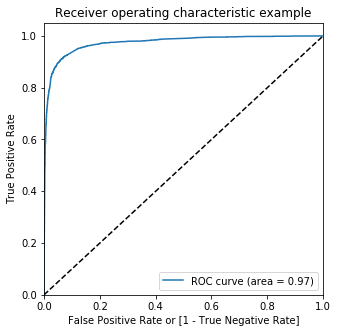

In [101]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_points)

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_points.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_points,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.985318,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996063,1,1,1,1,1,1,1,1,1,1,1
2,1,0.981540,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032752,0,1,0,0,0,0,0,0,0,0,0
4,0,0.224880,0,1,1,1,0,0,0,0,0,0,0


In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.849824  0.973474  0.773960
0.2   0.2  0.903458  0.952842  0.873159
0.3   0.3  0.925232  0.918737  0.929217
0.4   0.4  0.928114  0.902737  0.943684
0.5   0.5  0.928594  0.881263  0.957634
0.6   0.6  0.926673  0.860632  0.967192
0.7   0.7  0.923631  0.838316  0.975975
0.8   0.8  0.906660  0.781474  0.983467
0.9   0.9  0.886647  0.718737  0.989667


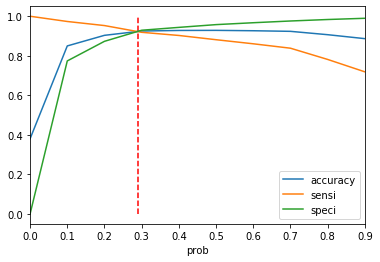

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.29, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_points.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_points,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.985318,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996063,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.981540,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032752,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.224880,0,1,1,1,0,0,0,0,0,0,0,0


In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.final_predicted, y_train_pred_final.Converted_points, drop_intermediate = False )

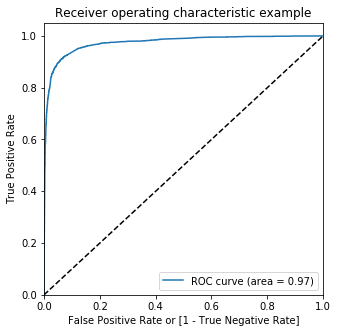

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_points)

In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9252321485750881

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3597,  274],
       [ 193, 2182]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9187368421052632

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.9292172565228624

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07078274347713769


In [114]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8884364820846905


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9490765171503958


In [116]:
#precesion
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8884364820846905

In [117]:
X_test.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Tags_nan,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Notable Activity_nan
count,2678.000000,2678.0,2678.000000,2678.000000,2678.000000,2678.000000,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.0,2678.000000,2678.0,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.0,2678.000000,2678.000000,2678.000000,2678.0,2678.0
mean,0.081404,0.0,3.176998,473.724795,2.315441,0.001494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323376,0.547797,0.068708,0.002987,...,0.003734,0.030246,0.004108,0.362584,0.008588,0.017177,0.0,0.304332,0.0,0.000373,0.002614,0.372666,0.017550,0.030246,0.0,0.235250,0.004854,0.006348,0.0,0.0
std,0.273506,0.0,2.962731,534.945663,1.922132,0.038626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.467852,0.497803,0.253004,0.054585,...,0.061005,0.171297,0.063970,0.480836,0.092293,0.129955,0.0,0.460210,0.0,0.019324,0.051069,0.483605,0.131335,0.171297,0.0,0.424234,0.069517,0.079436,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,1.000000,8.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.0,3.000000,242.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.0,5.000000,906.000000,3.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,0.0,17.000000,2253.000000,9.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0


## Making prediction on test data

In [118]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]=scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Tags_nan,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Last Notable Activity_nan
7625,0,0,-0.397202,2.077703,-0.136180,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5207,0,0,0.297929,0.739164,0.926758,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2390,0,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4362,0,0,-0.397202,-0.455310,-0.136180,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1023,0,0,4.121147,-0.300302,1.458226,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Tags_nan,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7625,0,2.077703,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5207,0,0.739164,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2390,0,-0.878390,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4362,0,-0.455310,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1023,0,-0.300302,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
X_test_sm = sm.add_constant(X_test)

In [121]:
y_test_pred = res.predict(X_test_sm)

In [122]:
y_test_pred[:10]

7625    0.137890
5207    0.970747
2390    0.997509
4362    0.024078
1023    0.012323
8226    0.993398
3079    0.051959
530     0.013313
7873    0.032752
5146    0.997688
dtype: float64

In [123]:
y_test['Converted_point']=y_test_pred
y_test.head()

,Converted,Converted_point
7625,0,0.137890
5207,1,0.970747
2390,1,0.997509
4362,0,0.024078
1023,0,0.012323


In [124]:
y_test['final_converted'] = y_test.Converted_point.map(lambda x: 1 if x > 0.3 else 0)
y_test.head()

,Converted,Converted_point,final_converted
7625,0,0.137890,0
5207,1,0.970747,1
2390,1,0.997509,1
4362,0,0.024078,0
1023,0,0.012323,0


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test.Converted, y_test.final_converted)

0.9253174010455564

In [126]:
confusion3=metrics.confusion_matrix(y_test.Converted, y_test.final_converted)
confusion3

array([[1563,  121],
       [  79,  915]], dtype=int64)

In [127]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.920523138832998

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9281472684085511

In [130]:
#precesion of the model
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8832046332046332

In [131]:
y_final=y_test.sort_values(by=['Converted_point'],ascending=False)
y_final.head(5)

,Converted,Converted_point,final_converted
4062,1,0.999926,1
8103,1,0.999898,1
7234,1,0.999881,1
6243,1,0.999838,1
3339,1,0.999814,1
